## EECS 491 Assignment 2
  Yue Shu  
  Spring 2019  
  Prof. Lewicki  

# Q1. Conditional Independence
Consider the following Bayes net,
![problem 1 image](Images/p1.png)

## 1.1
**Show that $a$ is independent of $b$ given no other infomration, i.e.
$$ a \perp b\, |\, \varnothing $$**


*Proof:* 

  To prove that $ a \perp b\, |\, \varnothing $, we need to show that: 
  $$p(a)\,p(b) = p(a,b)$$  
  According to the DAG above,  
  $$ p(a,b) = \sum_c p(c|a,b) \, p(a) \, p(b) $$
  $$ p(a,b) = p(a) \, p(b) \, \sum_c p(c|a,b) $$  
  And since $ \sum _c p(c|a,b) = 1$, we may conclude that  
  $$ p(a,b) = p(a) \, p(b)$$  
  And therefore, 
  $$ a \perp b\, |\, \varnothing $$

## 1.2 
**Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$**

*Disproof:* 

  To disprove that  $ a \perp b | e $, we need to show that $ p(a|e) \, p(b|e) \neq p(a,b|e) $.  
  According to Bayes Rule and the DAG above, 
  $$ p(a,b|e) = \frac{p(a,b,e)}{p(e)} = \frac{1}{p(e)} \sum_{c} p(e|c) \, p(c|a,b) \, p(a) \, p(b) $$  
  Since 
  $$ p(a|e) \, p(b|e) \neq \frac{1}{p(e)} \sum_{c} p(e|c) \, p(c|a,b) \, p(a) \, p(b) $$  
  We may conclude that 
  $$ p(a|e) \, p(b|e) \neq p(a,b|e) $$  
  And therefore,  
  $$a \not\!\perp\!\!\!\perp b | e$$


# Q2. Conditional Independence and Causality

Consider the following model
![problem 2 image](Images/p2.png)

**Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?**

The causal relationship suggested by the arrows does not necessarily hold because the either the arrow from $a$ to $b$ or the arrow from $a$ to $c$ can be reversed, while the original conditional independence assumption remains the same. For example, the below model represents the alternative possibility: 

[b] --> [a] --> [c]

The conditional independence assumption of the model above is same as the original model, which is $b$ and $c$ are conditionally independent given $a$. 

# Q3. Model Complexity, Free Parameters, and Simplifying Assumptions

## 3.1

**Consider a general probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?**

The joint distribution can be expressed as below, where $parents(x_i)$ denotes the cause of $x_i$ with the specific value corresponding to it: 

$$p(x_1, \, x_2, \, ..., \, x_N) = \prod_{i = 1}^{N} p(x_i |\, parents(x_i)) $$
$$p(x_1, \, x_2, \, ..., \, x_N) = \prod_{i = 1}^{N} p(x_i | \, x_{1}, \, ..., \, x_{i - 1})$$

## 3.2

**What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.)**

  There are k possible values for each distinct N variables, so we would need $k^N$ parameters to represent all of the probabilities of the model. However, since the probabilities must sum to 1, the value of the last parameter can be calculated by substracting the sum of the first $K^N - 1$ parameters from 1.  
  Therefore, there is a total of $K^N - 1$ free-parameters to specify the model.

## 3.3 

**Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?**

  Since now each variable has at most $m$ parents, there are $m$ variables as the parent nodes, and a total of $m$ variables each corresponding to $m$ parent nodes to be specified in order to define the model.  
  Therefore, we need (at most) a total of $m  K^{m} - 1$ free parameters to define the model.  

## 3.4 

**Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (see Q3).  What is the expression for the number of parameters in this case?**

From the noisy-OR function in Q4 below, we can conclude that we only need to specify the leaky node of variable $x_i$ as well as at most $m$ of its parents in order to define the conditional probability distribution of one single variable. 
$$ p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j} $$
Therefore, the expression for the number of free parameters $n$ needed to define a complete model in this case is $n \leq m^2 - 1$ since a total of $m$ variables should be defined.

# Q4. Models of Conditional Probability

**In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions**

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

**As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model**

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

**where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.**

## 4.1
**Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.**

  If at least one of the parents is 1, say, $\mu_{ij} = 1$, then according to the given equation above,   
$$ p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j} $$
$$ p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) * 0 = 1 - 0 = 1$$
  And this is also same for all the rest of the parents of $x_i$ because of the $\prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}$ component in the equation.  
  Therefore, the noisy-OR function can be interpreted as a "soft" form of the logical OR function. 

## 4.2 
**What is the interpretation of $\mu_{i0}$? Provide a clear explanation.**

  $\mu_{i0}$ can be considered as a leaky probability for $x_i$, which represents the unobserved or the unknown causes for $x_i$ .
  To make better sense of that, let's first suppose that $x_i$ is independent on all of the other events in the model, which denotes $x_j = 0$, and thus 
  $$\prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j} = 1$$  
  And the final expression of $x_i$ in terms of all of its "parents" (which don't necessarily exist) will become 
  $$ p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0})$$
  Without the existence of $\mu_{i0}$, the final outcome of $x_i$ would be 0, which wouldn't make so much sense in this case, where the probability of a completely independent event should just be the probability of itself, or in real life scenarios, there could be some unmodeled causes that we ignored.  
  Furthermore, suppose that $x_i$ has some parents, but all of its parents fail, in which case we would have, same as the previous assumption, 
  $$\prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j} = 1$$  
  And the final expression of $x_i$ in terms of all of its parents will once again become the expression below without the existence of the dummy parameter.  
  $$ p(x_i | \textrm{pa}({x_i})) = 1 - 1 = 0$$
  While the actual result of $x_i$ should just be the probability that $x_i$ will happen on its own, or the probability of some unknown causes that still should be taken into consideration.  
  Therefore, by applying the parameter $\mu_{i0}$, we could make the result less "absolute" and the final result we have for the scenarios above will become $$ p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) = \mu_{i0}$$
  
---

**Another choice for the conditional probability is a sigmoid function**

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

**where $\sigma (a)$ is the logistic sigmoid function.**

## 4.3 
**Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?**

To identify the mathematical difference between the noisy-OR function and the sigmoid function, let's take a look at the following conditional baysian network:

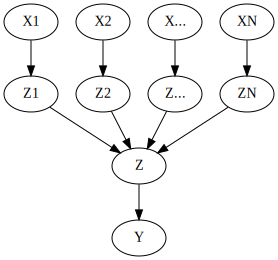

In [1]:
from graphviz import Digraph

# A DAG to demonstrate the mathematical difference between noisy-OR and sigmoid function
dot = Digraph()
dot.node('A', 'X1')
dot.node('B', 'X2')
dot.node('C', 'X...')
dot.node('D', 'XN')
dot.node('E', 'Z1') 
dot.node('F', 'Z2')
dot.node('G', 'Z...')
dot.node('H', 'ZN')
dot.node('M', 'Z')
dot.node('J', 'Y')
dot.edges(['AE', 'BF', 'CG', 'DH', 'EM', 'FM', 'GM', 'HM', 'MJ'])
dot

**noisy-OR function**:  
- substract the product of noise parameters from 1  
- the transition from $X_i$ to $Z_i$ represents the simple noisy model in the network  
- the transition from $Z_i$ to $Z$ represents the OR-gate logically, and is represented by the $\prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}$ in the equation from previous parts (ignoring the leak node)
- **the model does not allow the modeling of negative cause effects since $0 \leq \mu_{ij} \leq 1$ should always be true**
- the transition from $Z$ to $Y$ is simply to substract the value of Z from 1
- the model does not provide continuous result 

**sigmoid function**:
- project the generalized linear model on the logistic function  
- the transition from $X_i$ to $Z_i$ is through $Z_i = w_iX_i$  
- the transition from $Zi$ to $Z$ is to sum all the $Z_i$s up, denoting a generalized linear model  
- **the model allows the modeling of negative cause effects by setting negative weights on the generalized linear model**
- the transition from $Z$ to $Y$ is through taking $Z$ as a parameter of the sigmoid function   
- the model provides **continuous results between 0 and 1**
 
So now that we have a more standardized strucutre of both function, we may come up with some of the conclusions. While both functions pertain the ability to decompose the influence of multiple causes into separate influences, the sigmoid function is more general than the noisy-OR function in that it allows the modeling of negative causal effects and provides continuous results covering from 0 to 1, whereas the noisy-OR model does not. 

I don't quite get what a "unique function" is supposed to mean here. But if we're talking about the uniqueness of the function's output given distinct input parameters, neither of the functions shall show the uniqueness, since both function can get duplicate outputs due to their mathematical structures. It is rather simple to play with numerical combinations to get the same result. 

## 4.4
**Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.**

### Example One: conditional independencies appropriately modeled by noisy-OR

  Let's first take a look at the case we've been talking about in part 4.2. Suppose that the possibility of even $X$ is depending on its parents $Y$ and $Z$, whereas very unfortunately, $p(X|Y) = p(X|Z) = 0$. In the noisy-OR model, we shall have a leak probability for $X$ representing the stand alone probabilit of $X$. Let's make that probability $0.02$.     
  So to plug in the values we have to the noisy-OR equation above, we shall have $\mu_{XY} = \mu_{XZ} = 0$, $\mu_{X0} = 0.02$, and the final equation would be 
$$
p(X | \textrm{pa}({X})) = 1 - (1 - 0.02) (1 - 0)^1(1 - 0)^1 = 0.02
$$
  Which is just the leak probability of the event. So from the example above, we shall see how the noisy-OR model maintain the original "state" of the parameters in its output by following the procedure as I explained in part 4.3. 
  
  However, when it comes to the sigmoid function, the probability will be calculated as below if we apply that leak probability as our bias directly:
$$
p(X | \textrm{pa}({X})) = \sigma
\left(
0.02 + 0
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$
$$
p(X | \textrm{pa}({X})) = \frac{1}{1+e^{-0.02}} \approx 0.505
$$
Therefore, the need for a well-defined weight bias $w_{i0}$ arises, which should be in a completely different shape as the leak probability we discussed before. 

In conclusion, it is hard to model the direct influence of leak probability when we are using the sigmoid function to model the conditional independencies. 


### Example Two: conditional independencies appropriately modeled by sigmoid function

As we've discussed in part 4.3, when it comes to the modeling that involves negative-effect causes, sigmoid will be a better choice. Suppose $X$ has two conditionally independent parents, $Y$ and $Z$. While $Y$ has a positive effect on the probability of $X$, $Z$ turns out to have a negative one. Suppose $p(X|Y) = 0.8$, $p(X|Z) = 0.001$, and the leak probability equals $0.02$. 

When we are doing the modeling with noisy-OR, there is no certain way for us to express the negative effect, since the best we can do is to let $\mu_{XZ}$ in the equation representing $p(X|Z)$ equal $0$. In this example, the final result will be 
$$
p(X | \textrm{pa}({X})) = 1 - (1 - 0.02) (1 - 0.8)^1(1 - 0.001)^1 \approx 0.804
$$
The result we get is actually quite close to the value of $p(X|Y)$, which correctly represent the conditional independency of this model to some extent. However, if the negative effect of $Z$ on $X$ is really high that it undermines the ultimate probability of $X$ even if we are given that $Y$ and $Z$ are two independent causes? In that case, we might play with the weight of $Z$ in sigmoid approach's linearization step. 

Suppose in the sigmoid model, we have $w_{XY} = 0.25$, $w_{XZ} = -0.7$, $w_{X0} = 0.04$. The result with this setup will become: 
$$
p(X | \textrm{pa}({X})) = \sigma
\left(
0.04 + 0.25 * 0.8 - 0.7 * 0.001
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$
$$
p(X | \textrm{pa}({X})) = \frac{1}{1+e^{-0.02}} \approx 0.560
$$
In this case, we have more freedom to modify the weight in the linear model so as to achieve the effect we want. 

Therefore, it would be more appropriate to use the sigmoid function to model conditional independencies in the case where negative causal effects are involved.

# Q5. Car Troubles (Barber Exercise 3.6)
## 5.1
**Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the Inference section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.**

![problem 5 image](Images/p5.png)
![problem 5 image](Images/p5-i.png)

Let's first come up with the joint distribution as a product of all the conditional distributions according to the given belief network above. 
$$ p(B,F,G,T,S) = p(G|B,F)p(T|B)p(S|T,F)p(B)p(F) $$

$$ p(B,F,G,T,S) = p(G|B,F)p(T|B)p(S|T,F)p(B)p(F) $$
Now we can compute the value of $p(f = empty | s = no)$ as below:
$$
p(F = empty| S = no) = \frac{p(F = empty, S = no)}{p(S = no)}
$$
$$
p(F = empty| S = no) = \frac{\sum_{B,G,T}p(B, F = empty, G, T, S = no)}{\sum_{B,F,G,T} p(B, F, G, T, S = no)}
$$
$$
p(F = empty| S = no) = \frac{\sum_{B,G,T} p(G|B,F=e) p(T|B)p(S = no|T, F=e) p(B) p(F = e)}{\sum_{B,F,G,T} p(G|B,F)p(T|B)p(S = no|T,F)p(B)p(F)}
$$
Let's first do some variable elimination to make our life easier:
for the numerator, 
$$
numerator = p(F = e)\sum_T p(S = no|T, F = e) \sum_B p(T|B) p(B) \sum_G p(G|B,F=e)
$$
$$
= p(F = e)\sum_T p(S = no|T, F = e) \sum_B p(T|B) p(B)
$$
So the final numerator we get is 
$$
p(F = e)\sum_T p(S = no|T, F = e) \sum_B p(T|B) p(B)
$$
For the denominator, we do the same variable elimination as below: 
$$
denominator = \sum_F p(F) \sum_T p(S = no|T,F) \sum_B p(T|B) p(B) \sum_G p(G|B,F)
$$
$$
= \sum_F p(F) \sum_T p(S = no|T,F) \sum_B p(T|B) p(B)
$$
So the final denominator we get is 
$$
\sum_F p(F) \sum_T p(S = no|T,F) \sum_B p(T|B) p(B)
$$
And the final expression for $p(f = empty | s = no)$ becomes
$$
\frac{p(F = e)\sum_T p(S = no|T, F = e) \sum_B p(T|B) p(B)}{\sum_F p(F) \sum_T p(S = no|T,F) \sum_B p(T|B) p(B)}
$$
And now we shall plug in the values we know: 
$$
\frac{p(F = e)\sum_T p(S = no|T, F = e) \sum_B p(T|B) p(B)}{\sum_F p(F) \sum_T p(S = no|T,F) \sum_B p(T|B) p(B)} 
$$
$$
 = 0.05*(0.99*(0.98*0.02+0.03*0.98) + 0.92*(0.02*0.02+0.97*0.98)) / (0.05*(0.99*(0.98*0.02+0.03*0.98) + 0.92*(0.02*0.02+0.97*0.98)) + 0.95*(1*(0.98*0.02+0.03*0.98) + 0.01*(0.02*0.02+0.97*0.98)))
$$
$$
 \approx 0.4537 
$$
So the probability of the fuel tank being empty given that the car does not start is approximately $0.4537$.

## 5.2 
**Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.**

Let's first have the bayesian belief network setup for this model with `pgmpy` as below:

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel([('B', 'G'), ('B', 'T'), ('F', 'G'), ('F', 'S'), ('T', 'S')])

priorB = TabularCPD(variable='B', variable_card=2, values=[[0.02, 0.98]]) ## let b = bad denotes 0
priorF = TabularCPD(variable='F', variable_card=2, values=[[0.05, 0.95]]) ## let f = empty denotes 0

# define p(G|B,F), let G = empty denotes 0
cpdG = TabularCPD(variable='G', variable_card=2, 
    evidence=['B', 'F'], evidence_card=[2, 2],
    values=[[0.99, 0.1, 0.97, 0.04], 
            [0.01, 0.9, 0.03, 0.96]])

# define p(T|B), let T = fa denotes 0
cpdT = TabularCPD(variable='T', variable_card = 2, 
    evidence=['B'], evidence_card=[2],
    values=[[0.98, 0.03], 
            [0.02, 0.97]])

# define p(S|T,F), let S = fa denotes 0
cpdS = TabularCPD(variable='S', variable_card=2, 
    evidence=['T', 'F'], evidence_card=[2, 2],
    values=[[0.99, 1.0, 0.92, 0.01], 
            [0.01, 0.0, 0.08, 0.99]])

model.add_cpds(priorB, priorF, cpdG, cpdT, cpdS)
model.check_model()

True

And now we shall play around a little bit with the CPDs to inspect if the network is setup correctly:

In [3]:
print(model.get_cpds('B'))
print(model.get_cpds('F'))
print(model.get_cpds('T'))
print(model.get_cpds('G'))
print(model.get_cpds('S'))

+-----+------+
| B_0 | 0.02 |
+-----+------+
| B_1 | 0.98 |
+-----+------+
+-----+------+
| F_0 | 0.05 |
+-----+------+
| F_1 | 0.95 |
+-----+------+
+-----+------+------+
| B   | B_0  | B_1  |
+-----+------+------+
| T_0 | 0.98 | 0.03 |
+-----+------+------+
| T_1 | 0.02 | 0.97 |
+-----+------+------+
+-----+------+-----+------+------+
| B   | B_0  | B_0 | B_1  | B_1  |
+-----+------+-----+------+------+
| F   | F_0  | F_1 | F_0  | F_1  |
+-----+------+-----+------+------+
| G_0 | 0.99 | 0.1 | 0.97 | 0.04 |
+-----+------+-----+------+------+
| G_1 | 0.01 | 0.9 | 0.03 | 0.96 |
+-----+------+-----+------+------+
+-----+------+-----+------+------+
| T   | T_0  | T_0 | T_1  | T_1  |
+-----+------+-----+------+------+
| F   | F_0  | F_1 | F_0  | F_1  |
+-----+------+-----+------+------+
| S_0 | 0.99 | 1.0 | 0.92 | 0.01 |
+-----+------+-----+------+------+
| S_1 | 0.01 | 0.0 | 0.08 | 0.99 |
+-----+------+-----+------+------+


Alright, it seems that everything turns out pretty well. Now we should get the posterior ready!

In [4]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
print(inference.query(['F'], evidence={'S' : 0}) ['F'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.4537 |
| F_1 |   0.5463 |
+-----+----------+


The answer looks exactly like the one we got from part 5.1. So we're good to go now. 

## 5.3 
**Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios.**

By the time we picked up the call, we have no prior knowledge about what's going wrong with the car, so we shall take a look at the inference table of all the possible causes:

In [5]:
print(inference.query(['F'], evidence={'S' : 0}) ['F'])
print(inference.query(['B'], evidence={'S' : 0}) ['B'])
print(inference.query(['T'], evidence={'S' : 0}) ['T'])
print(inference.query(['G'], evidence={'S' : 0}) ['G'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.4537 |
| F_1 |   0.5463 |
+-----+----------+
+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |   0.1927 |
| B_1 |   0.8073 |
+-----+----------+
+-----+----------+
| T   |   phi(T) |
|-----+----------|
| T_0 |   0.4813 |
| T_1 |   0.5187 |
+-----+----------+
+-----+----------+
| G   |   phi(G) |
|-----+----------|
| G_0 |   0.4732 |
| G_1 |   0.5268 |
+-----+----------+


By the beginning, it seems that either the gauge or the turn over of the engine could get wrong given the car won't start, and the major cause of the problem is more likely to be the case where the fuel is empty compared to the possibility that the battery is bad. So we'd need to ask more about the condition of the gauge and the turn over to gain more evidence for our inference. Let's have two different scenarios:  

### Scenario One

We first asked about the condition of the gauge, and the answer was the gauge was empty. So we shall add the evidence to our inference for scenario one as below: 

In [6]:
inference1 = VariableElimination(model)
print(inference1.query(['F'], evidence={'S' : 0, 'G' : 0}) ['F'])
print(inference1.query(['B'], evidence={'S' : 0, 'G' : 0}) ['B'])
print(inference1.query(['T'], evidence={'S' : 0, 'G' : 0}) ['T'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.9306 |
| F_1 |   0.0694 |
+-----+----------+
+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |   0.0590 |
| B_1 |   0.9410 |
+-----+----------+
+-----+----------+
| T   |   phi(T) |
|-----+----------|
| T_0 |   0.1111 |
| T_1 |   0.8889 |
+-----+----------+


  We shall see how the possibility of the fuel being empty dramatically increases given that the car won't start and the gauge is empty. Also, our belief on the condition of the car's engine changes as well, as right now we believe that the car engine is very unlikely to turn over compared to our original belief.   
  Now we can gain more information about the engine's condition to confirm our belief.  
  We asked our dear friend if the engine would turn over, and he seemed to loose his patience: "No!"  
  Good guess on the engine. Let's add that evidence to our inference and see how that changes our belief on the condition of the car's battery and fuel tank:  

In [7]:
print(inference1.query(['F'], evidence={'S' : 0, 'G' : 0, 'T' : 0}) ['F'])
print(inference1.query(['B'], evidence={'S' : 0, 'G' : 0, 'T' : 0}) ['B'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.4433 |
| F_1 |   0.5567 |
+-----+----------+
+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |   0.5274 |
| B_1 |   0.4726 |
+-----+----------+


Now we can see a dramatic increase in the possibility that the battery was bad and a dramatic decrease in the possibility that the fuel tank was empty given the car won't start, the gauge was empty, and the engine wouldn't turn over. But it's most likely a half-and-half chance, so we still couldn't know what on earth is wrong with the car -- or could it be both the battery and the fuel tank were having some problems? The car mechanics should figure it out, while as a CS student learning probability, I shall gladly take the numbers. Chill isn't it? 

### Scenario Two

  This time, when we asked our friend about the condition of the gauge, he seemed pretty confused since apparently the gauge wasn't empty yet. So let's add that evidence to our inference query: 

In [8]:
inference2 = VariableElimination(model)
print(inference2.query(['F'], evidence={'S' : 0, 'G' : 1}) ['F'])
print(inference2.query(['B'], evidence={'S' : 0, 'G' : 1}) ['B'])
print(inference2.query(['T'], evidence={'S' : 0, 'G' : 1}) ['T'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.0255 |
| F_1 |   0.9745 |
+-----+----------+
+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |   0.3128 |
| B_1 |   0.6872 |
+-----+----------+
+-----+----------+
| T   |   phi(T) |
|-----+----------|
| T_0 |   0.8137 |
| T_1 |   0.1863 |
+-----+----------+


  It seems that we're getting closer to an answer, since the probability that the fuel tank is empty given the car won't start and the gauge isn't empty is prettly low, while there is a certain increase in the possibility that the car has a bad battery given the evidence above. Furthermore, it seems very likely to us that the engine won't turn over given the information we had.  
  So to make sure that there could be actually something wrong with the battery, we asked our friend if the engine could turn over, and he seemed pretty certain that it couldn't.  
  Given the information above, again let's update our evidence for the inference: 

In [9]:
print(inference2.query(['F'], evidence={'S' : 0, 'G' : 1, 'T' : 0}) ['F'])
print(inference2.query(['B'], evidence={'S' : 0, 'G' : 1, 'T' : 0}) ['B'])

+-----+----------+
| F   |   phi(F) |
|-----+----------|
| F_0 |   0.0012 |
| F_1 |   0.9988 |
+-----+----------+
+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |   0.3844 |
| B_1 |   0.6156 |
+-----+----------+


  This time, according to the table above, it seems that given the car won't start, the gauge isn't empty, and the engine won't turn over, the possibility that the fuel tank was empty is actually very low and we can almost neglect that chance.  
  Still, the chance that the battery is bad isn't that high, but we can see a certain increase in the number. And a roughly forty percent chance definitely worth the try to either recharge or replace the battery to see how it works out.  

# Q6. Exploration

  Disease diagnosis has been one of the most important purposes of Bayesian belief network. In my exploration part, I will be setting up a model and do some inference on the cause of my friend's cat, *Nana*'s death. 
  
  Let's start with the background of my exploration. Nana is the name of a one-year-old female Ragdoll raised by one of my best friends at Case, Ezra. Ezra adpoted the cat in his home country China last year in May, and left Nana at home with his parents when he got back to the states for college. Last week on Feb 21, Ezra picked up a call from his mom, who informed him of the death of Nana's. He was told that Nana started with continuous diarrhea. At first, Ezra's mom thought it was caused by lactose intolerance, since Nana liked to drink milk from human's glasses a lot, whereas cats are not supposed to drink any milk. But by the time Ezra's mom noticed that something was different, Nana had already started to have difficulty in breathing. Half an hour later than Nana was sent to the hospitol, she passed away.  
  
  According to the report, Nana died of cardiorespiratory failure which made her have difficulty in breathing. But the cause of cardiorespiratory failure could vary a lot, and the complication makes it even harder to distinguish the actual cause in real life. Therefore, the purpose for this exploration is to try to have a general idea about Nana's condition, and locate the most likely cause of her death. Still, I'm not a vet, and I have no further knowledge about animal health, so I will set up the belief network with my existing knowledge about animal disease in general. 

Let's first take a look at the original belief network I have without any simplification: 

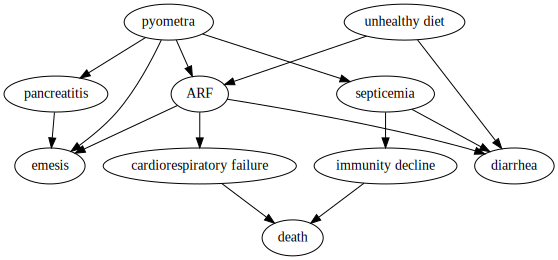

In [10]:
bn = Digraph()
bn.node('A', 'unhealthy diet')
bn.node('B', 'pyometra')
bn.node('C', 'pancreatitis')
bn.node('D', 'ARF')
bn.node('E', 'septicemia') 
bn.node('F', 'emesis')
bn.node('G', 'diarrhea')
bn.node('H', 'cardiorespiratory failure')
bn.node('I', 'immunity decline')
bn.node('J', 'death')
bn.edges(['AD', 'AG', 'BF', 'BC', 'BD', 'BE', 'CF', 'DF', 'DG', 'DH', 'EG', 'EI', 'HJ', 'IJ'])
bn

As we can see above, the belief network we have at first could be very complicated, given that we allow direct relation between the higher level cause and lower level effects. To simplify our belief network, let's assume there exists conditional independencies between the complications, and provide a hierarchical structure for the network. The simplified belief network should look like below: 

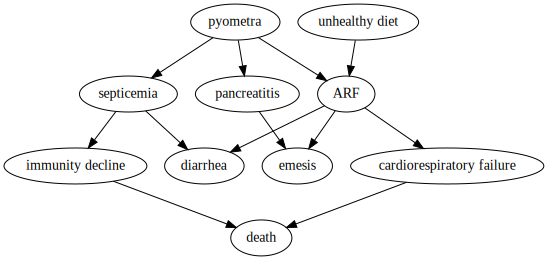

In [11]:
bn = Digraph()
bn.node('A', 'unhealthy diet')
bn.node('B', 'pyometra')
bn.node('C', 'pancreatitis')
bn.node('D', 'ARF')
bn.node('E', 'septicemia') 
bn.node('F', 'emesis')
bn.node('G', 'diarrhea')
bn.node('H', 'cardiorespiratory failure')
bn.node('I', 'immunity decline')
bn.node('J', 'death')
bn.edges(['AD', 'BC', 'BD', 'BE', 'CF', 'DF', 'DG', 'DH', 'EG', 'EI', 'HJ', 'IJ'])
bn

So now we have a hierarchical structure as we desired, we shall briefly review all the nodes in the network:

- `pyometra`: one likely fatal cause of unneutered pets, could lead to septicemia, pancreatitis, as well as ARF. $PY = \{T, F\}$
- `unhealty diet`: the number one killer of pet cats, since it is highly likely to result in ARF and many other inflammation. $UD = \{T, F\}$ 
- `septicemia`: resulted from pyometra. Can result in both diarrhea and immunity decline by the decreasing in number of leukocyte. $SE = \{T, F\}$
- `pancreatitis`: resulted from pyometra, could result in emesis $PA = \{T, F\}$
- `ARF`: acute renal failure. Could be resulted from both pyometra and unhealthy diet. $ARF = \{T, F\}$
- `immunity decline`: resulted from septicemia. Can be fatal. $ID = \{T, F\}$
- `diarrhea`: can be resulted from both septicemia and ARF. Nana was diagnosed with diarrhea. $DI = \{T, F\}$
- `emesis`: can be resulted from both pancreatitis and ARF. Nana was diagnosed with emesis. $EM = \{T, F\}$
- `cardiorespiratory failure`: resulted from ARF. Could be fatal in that the patient would experience difficulty in breathing. Nana was diagnosed with cardiorespiratory failure. $CF = \{T, F\}$
- `death`: $DE = \{T, F\}$

Now that we have the belief network and all its components setup and explained, we shall come up with the joint distribution of the network for future use. According to the model above, the joint distribution we have should be:
$$
p(PY, UD, SE, PA, ARF, ID, DI, EM, CF, DE) = p(DE|ID, CF)p(ID|SE)p(DI|SE,ARF)p(EM|PA, ARF)p(CF|ARF)p(SE|PY)p(PA|PY)p(ARF|PY,UD)
$$

We shall also use the `pgmpy` toolbox as we did before in prblem 5 to set the model up. The priors and CPDs will be defined as below: 

In [12]:
p6 = BayesianModel([('PY', 'SE'), ('PY', 'PA'), ('PY', 'ARF'), ('UD', 'ARF'), 
                    ('SE', 'ID'), ('SE', 'DI'), ('PA', 'EM'), ('ARF', 'DI'), 
                    ('ARF', 'EM'), ('ARF', 'CF'), ('ID', 'DE'), ('CF', 'DE')])

priorPY = TabularCPD(variable='PY', variable_card=2, values=[[0.696, 0.304]]) ## let PY = FALSE denotes 0
priorUD = TabularCPD(variable='UD', variable_card=2, values=[[0.12, 0.88]]) ## let UD = FALSE denotes 0

# define p(DE|ID,CF), let DE = FALSE denotes 0
cpdDE = TabularCPD(variable='DE', variable_card=2, 
    evidence=['ID', 'CF'], evidence_card=[2, 2],
    values=[[0.82, 0.08, 0.34, 0.02], 
            [0.18, 0.92, 0.66, 0.98]])

# define p(ID|SE), let ID = FALSE denotes 0
cpdID = TabularCPD(variable='ID', variable_card = 2, 
    evidence=['SE'], evidence_card=[2],
    values=[[0.78, 0.08], 
            [0.22, 0.92]])

# define p(DI|SE,ARF), let DI = FALSE denotes 0
cpdDI = TabularCPD(variable='DI', variable_card=2, 
    evidence=['SE', 'ARF'], evidence_card=[2, 2],
    values=[[0.72, 0.12, 0.64, 0.03], 
            [0.28, 0.88, 0.36, 0.97]])

# define p(EM|PA,ARF), let EM = FALSE denotes 0
cpdEM = TabularCPD(variable='EM', variable_card=2, 
    evidence=['PA', 'ARF'], evidence_card=[2, 2],
    values=[[0.68, 0.15, 0.11, 0.02], 
            [0.32, 0.85, 0.89, 0.98]])

# define p(CF|ARF), let CF = FALSE denotes 0
cpdCF = TabularCPD(variable='CF', variable_card = 2, 
    evidence=['ARF'], evidence_card=[2],
    values=[[0.85, 0.08], 
            [0.15, 0.92]])

# define p(SE|PY), let SE = FALSE denotes 0
cpdSE = TabularCPD(variable='SE', variable_card = 2, 
    evidence=['PY'], evidence_card=[2],
    values=[[0.82, 0.14], 
            [0.18, 0.86]])

# define p(PA|PY), let PA = FALSE denotes 0
cpdPA = TabularCPD(variable='PA', variable_card = 2, 
    evidence=['PY'], evidence_card=[2],
    values=[[0.92, 0.10], 
            [0.08, 0.90]])

# define p(ARF|PY,UD), let ARF = FALSE denotes 0
cpdARF = TabularCPD(variable='ARF', variable_card=2, 
    evidence=['PY', 'UD'], evidence_card=[2, 2],
    values=[[0.97, 0.36, 0.72, 0.05], 
            [0.03, 0.64, 0.28, 0.95]])

p6.add_cpds(priorPY, priorUD, cpdDE, cpdID, cpdDI, cpdEM, cpdCF, cpdSE, cpdPA, cpdARF)
p6.check_model()

True

Now that we have all the CPDs setup, let's take a look at the CPD entries of the model:

In [13]:
print(p6.get_cpds('PY'))
print(p6.get_cpds('UD'))
print(p6.get_cpds('SE'))
print(p6.get_cpds('PA'))
print(p6.get_cpds('ARF'))
print(p6.get_cpds('ID'))
print(p6.get_cpds('DI'))
print(p6.get_cpds('EM'))
print(p6.get_cpds('CF'))
print(p6.get_cpds('DE'))

+------+-------+
| PY_0 | 0.696 |
+------+-------+
| PY_1 | 0.304 |
+------+-------+
+------+------+
| UD_0 | 0.12 |
+------+------+
| UD_1 | 0.88 |
+------+------+
+------+------+------+
| PY   | PY_0 | PY_1 |
+------+------+------+
| SE_0 | 0.82 | 0.14 |
+------+------+------+
| SE_1 | 0.18 | 0.86 |
+------+------+------+
+------+------+------+
| PY   | PY_0 | PY_1 |
+------+------+------+
| PA_0 | 0.92 | 0.1  |
+------+------+------+
| PA_1 | 0.08 | 0.9  |
+------+------+------+
+-------+------+------+------+------+
| PY    | PY_0 | PY_0 | PY_1 | PY_1 |
+-------+------+------+------+------+
| UD    | UD_0 | UD_1 | UD_0 | UD_1 |
+-------+------+------+------+------+
| ARF_0 | 0.97 | 0.36 | 0.72 | 0.05 |
+-------+------+------+------+------+
| ARF_1 | 0.03 | 0.64 | 0.28 | 0.95 |
+-------+------+------+------+------+
+------+------+------+
| SE   | SE_0 | SE_1 |
+------+------+------+
| ID_0 | 0.78 | 0.08 |
+------+------+------+
| ID_1 | 0.22 | 0.92 |
+------+------+------+
+------+--

Everything seems to be in the good shape, and we can finally add the evidence we know so far: 

$$
DI = \textsf{TRUE} 
$$
$$
EM = \textsf{TRUE}
$$
$$
CF = \textsf{TRUE}
$$
$$
DE = \textsf{TRUE}
$$
Now let's take a look at the probability of Nana's cause of death given the evidence we have above. 

In [14]:
p6_inference = VariableElimination(p6)
print(p6_inference.query(['UD'], evidence={'DI' : 1, 'CF' : 1, 'DE' : 1, 'EM' : 1}) ['UD'])
print(p6_inference.query(['PY'], evidence={'DI' : 1, 'CF' : 1, 'DE' : 1, 'EM' : 1}) ['PY'])

+------+-----------+
| UD   |   phi(UD) |
|------+-----------|
| UD_0 |    0.0255 |
| UD_1 |    0.9745 |
+------+-----------+
+------+-----------+
| PY   |   phi(PY) |
|------+-----------|
| PY_0 |    0.5492 |
| PY_1 |    0.4508 |
+------+-----------+


We can also take a look at the probability that Nana got an ARF. 

In [15]:
print(p6_inference.query(['ARF'], evidence={'DI' : 1, 'CF' : 1, 'DE' : 1, 'EM' : 1}) ['ARF'])

+-------+------------+
| ARF   |   phi(ARF) |
|-------+------------|
| ARF_0 |     0.0128 |
| ARF_1 |     0.9872 |
+-------+------------+


The numbers we get here confirm with my guess that Nana died of ARF caused by unhealty diet habit. Again, this is an extremely simplified model, and the data might not be quite reliable.

However, what we CAN learn from the model above is the importance of healthy diet for cats. Cats are not human, and they should never eat the same food as human beings eat. 

I feel very sorry for Ezra's lost, and I hope Nana can rest in peace. 